# Setup

In [1]:
require 'torch'
require 'nn'
require 'nngraph'
require 'cunn'
require 'cutorch'
nngraph.setDebug(false)
-- load custom modules
require 'utils/load'
require 'utils/Sampler'
Plot = require 'itorch.Plot'
sampler = nn.Sampler():cuda()

In [28]:
-- get data
data = loadupdown()
-- modify data
data.train = data.train:reshape(data.train:size(1), 4096)
data.train:div(255.)
data.train = -data.train + 1
train = data.train
x_size = 1

In [29]:
-- load saved cvae model
saved = torch.load('save/updown_CVAE_z1_k3.t7')
model = saved.model
prior = saved.prior
encoder = saved.encoder
decoder = saved.decoder

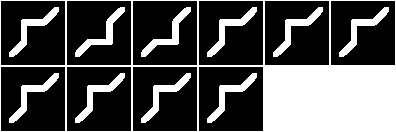

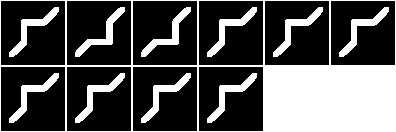

In [30]:
-- select images
N = 10
indices = torch.randperm(train:size(1)):long():split(N)
v = indices[1]
x_input = torch.zeros(N, x_size):cuda()
y_input = train:index(1, v)
-- cvae
out = {unpack(model:forward({x_input, y_input}))}
-- original image
itorch.image(y_input:reshape(N, 1, 64, 64))
-- reconstructed image
itorch.image(out[#out]:reshape(N, 1, 64, 64))

# True Prior Distribution

In [31]:
-- select images
N = 1000
indices = torch.randperm(train:size(1)):long():split(N)
v = indices[1]
x_input = torch.zeros(N, x_size):cuda()
y_input = train:index(1, v)
-- cvae
mu_logv = encoder:forward({x_input, y_input})
code = sampler:forward(mu_logv)
plot = Plot():histogram(code:double()):draw()
plot:title("True Prior Distribution"):redraw()

In [32]:
pi

 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996 

 0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001 

 0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002


 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996 

 0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001 

 0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002
 0.0001  0.9996  0.0002


In [33]:
-- select images
N = 1000
indices = torch.randperm(train:size(1)):long():split(N)
v = indices[1]
x_input = torch.zeros(N, x_size):cuda()
-- cvae
pmu_plogv_pi = {unpack(prior:forward(x_input))}

In [34]:
pi = pmu_plogv_pi[#pmu_plogv_pi]
a = torch.multinomial(pi, 1)
K = pi:size(2)
pmu = torch.zeros(#pmu_plogv_pi[1]):cuda()
plogv = torch.zeros(#pmu_plogv_pi[1]):cuda()
for i=1,pmu:size(1) do
    pmu[i] = pmu_plogv_pi[a[{i,1}]][i]
    plogv[i] = pmu_plogv_pi[a[{i,1}]+K][i]
end

In [35]:
code = sampler:forward({pmu, plogv})
plot = Plot():histogram(code:double()):draw()
plot:title("Estimated Prior Distribution"):redraw()

# Sampling

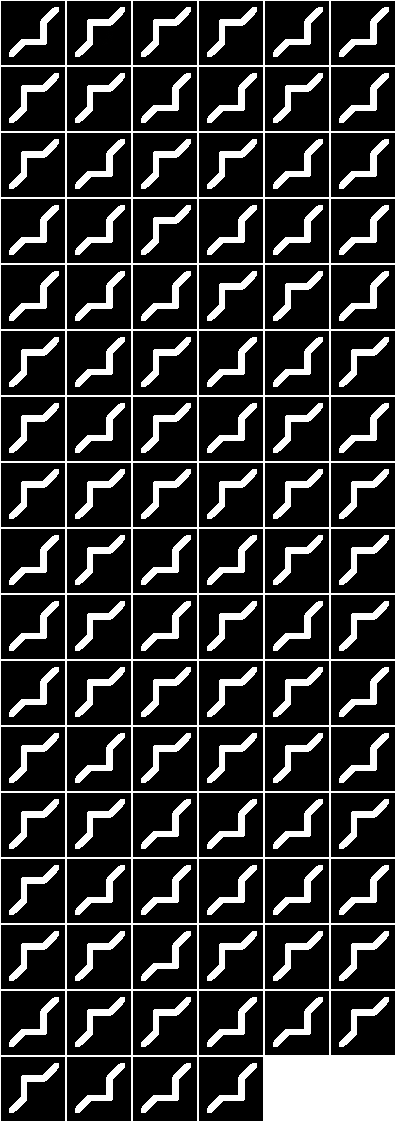

In [36]:
-- select images
N = 100
indices = torch.randperm(train:size(1)):long():split(N)
v = indices[1]
x_input = torch.zeros(N, x_size):cuda()
-- cvae
pmu_plogv_pi = {unpack(prior:forward(x_input))}

pi = pmu_plogv_pi[#pmu_plogv_pi]
a = torch.multinomial(pi, 1)
K = pi:size(2)
pmu = torch.zeros(#pmu_plogv_pi[1]):cuda()
plogv = torch.zeros(#pmu_plogv_pi[1]):cuda()
for i=1,pmu:size(1) do
    pmu[i] = pmu_plogv_pi[a[{i,1}]][i]
    plogv[i] = pmu_plogv_pi[a[{i,1}]+K][i]
end

code = sampler:forward({pmu, plogv})
recon = decoder:forward({x_input, code})
itorch.image(recon:reshape(N, 1, 64, 64))